# <center> Trocatine 🐰 </center>
### <center> Teste A/B </center>

## 0. Configurações e Variáveis

### 0.1. Importações

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import pickle

### 0.2. Variáveis

In [2]:
modelos_before = pickle.load(open('./modelos_before.pk1','rb'))
modelos_after = pickle.load(open('./modelos_after.pk1','rb'))

In [9]:
# Leitura do teste A
teste_a = modelos_before['tree'][0]['F1s']

# Leitura do teste B 
teste_b = modelos_after['knn']['media_score_etapa']

In [10]:
significancia = 0.05
confianca = 0.95
tcritico = 1.697 # Tirado da tabela

## 1. Teste A

In [11]:
# Calculando as médias
media_A = np.mean(teste_a)
media_B = np.mean(teste_b)

# Calculando erro padrão para intervalos de confiança
erro_padrao_A = np.sqrt((media_A * (1 - media_A)) / teste_a)
erro_padrao_B = np.sqrt((media_B * (1 - media_B)) / teste_b)

# Intervalos de confiança de 95%
intervalo_A = norm.interval(confianca, loc=media_A, scale=erro_padrao_A)
intervalo_B = norm.interval(confianca, loc=media_B, scale=erro_padrao_B)

In [12]:
# Realizar o teste t
t_stat, p_valor = stats.ttest_ind(teste_a, teste_b)

print(f'Estatística t: {t_stat}')
print(f'Valor p: {p_valor}')

if p_valor < significancia:
    print("A diferença é estatisticamente significativa. Podemos rejeitar a hipótese nula.")
else:
    print("A diferença não é estatisticamente significativa. Não podemos rejeitar a hipótese nula.")

Estatística t: 2.519261434252891
Valor p: 0.03584999306638383
A diferença é estatisticamente significativa. Podemos rejeitar a hipótese nula.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


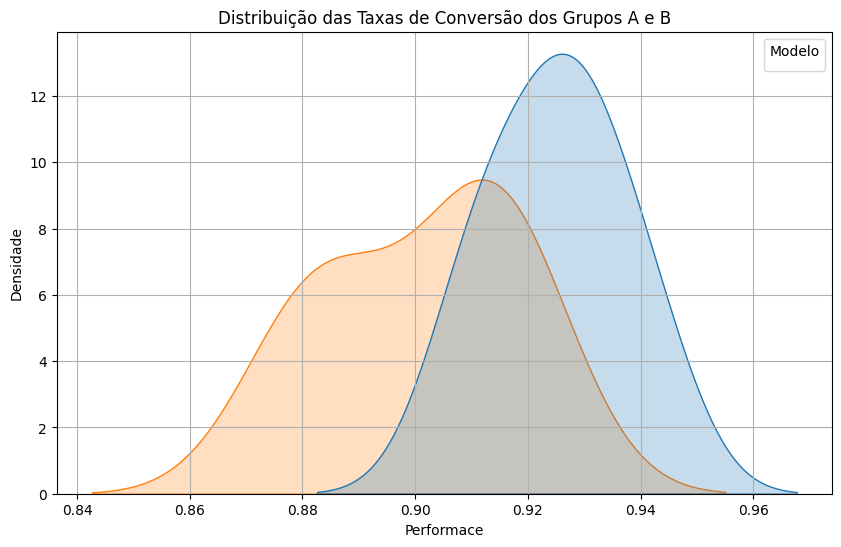

In [23]:
dois = pd.DataFrame({
    'Performace': teste_a + teste_b,
    'Modelo': ['Tree'] * len(teste_a) + ['KNN'] * len(teste_b)
})

plt.figure(figsize=(10, 6))
sns.kdeplot(data=dois, x='Performace', hue='Modelo', fill=True)

# Adicionando rótulos e título
plt.title("Distribuição das Taxas de Conversão dos Grupos A e B")
plt.xlabel("Performace")
plt.ylabel("Densidade")
plt.legend(title='Modelo')
plt.grid(True)

# Exibindo o gráfico
plt.show()

C:\Users\sarahbatista-ieg\AppData\Local\Temp\ipykernel_308\416980111.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Modelo', y='Performace', data=dois, palette="Set2")


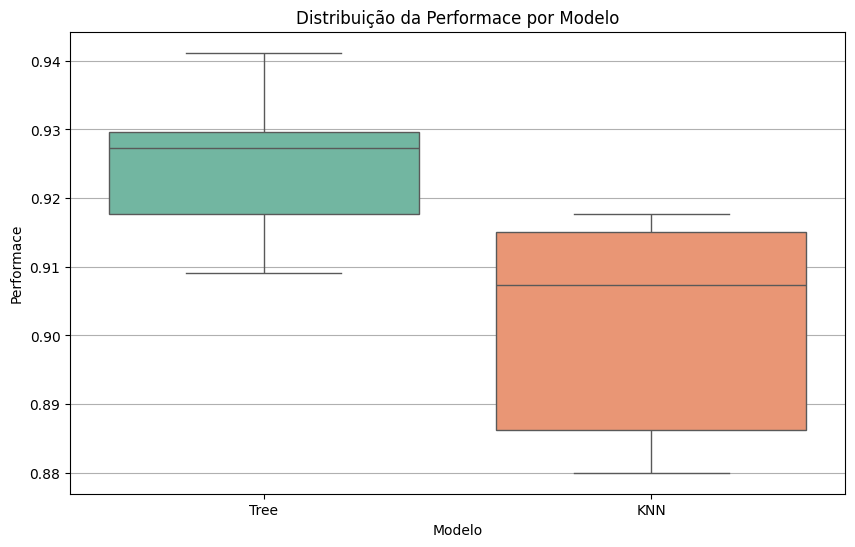

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Modelo', y='Performace', data=dois, palette="Set2")
plt.title('Distribuição da Performace por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Performace')
plt.grid(axis='y')